In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Load dataset
file_path = "D:/Deep Learning Data/Churn_Modelling.csv"  # Updated file path
df = pd.read_csv(file_path)

In [3]:
# Drop unnecessary columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [4]:
print(df)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

In [6]:
# Handle outliers in 'Age' using the IQR method
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

In [7]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [8]:
# Split dataset into train and test sets
X = df.drop(columns=["Exited"])
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Build deep neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

C:\Users\amlan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7978 - loss: 0.5127 - val_accuracy: 0.8134 - val_loss: 0.4223
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8075 - loss: 0.4436 - val_accuracy: 0.8232 - val_loss: 0.4062
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8053 - loss: 0.4367 - val_accuracy: 0.8269 - val_loss: 0.4043
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8044 - loss: 0.4430 - val_accuracy: 0.8336 - val_loss: 0.4063
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8135 - loss: 0.4305 - val_accuracy: 0.8310 - val_loss: 0.3972
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8202 - loss: 0.4185 - val_accuracy: 0.8320 - val_loss: 0.3959
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8299 - loss: 0.4070 - val_accuracy: 0.8351 - val_loss: 0.3944
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8270 - loss: 0.4077 - val_accuracy: 0.

In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8497


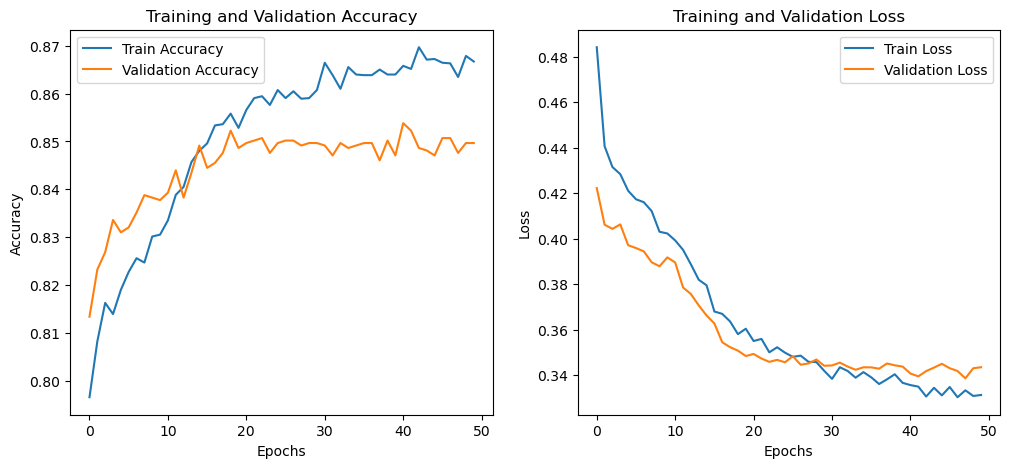

In [13]:
# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [14]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1479   57]
 [ 233  160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1536
           1       0.74      0.41      0.52       393

    accuracy                           0.85      1929
   macro avg       0.80      0.69      0.72      1929
weighted avg       0.84      0.85      0.83      1929

